## Fourier Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math
import scipy.signal

#### The Square Function
Create a python function for the square function shown below.
This function has a period of $2\pi$ and alternates between $0$ and $1$.

<img width=600px src="SquareFunction.png">

In [2]:
def squareFunction(x):
    ### TO DO: Create a square function
    #x/pi = randint, round up w +0.5, if odd then 1, if even then -1
    return(scipy.signal.square(x))
    pass

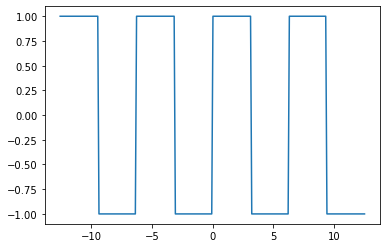

In [3]:
### TO DO: Plot the square function from (-4pi, 4pi)
x = np.arange(-4*math.pi, 4*math.pi, 0.1)
y = squareFunction(x)
plt.plot(x, y)

Visually, verify your plot matches the graph in the image above.

#### The Sine Series
Create a function that returns the sum of the first $k$ elements of the fourier sine series. 

In [4]:
def fourierSineSeries(k, bk, x):
    """
    Returns the sum of the first k elements of the fourier sine series
    Parameters:
        k: the number of elements to summate
        bk: the coefficients of each element
        x: the x value to evaluate
    Returns:
        The S(x) approximation using the fourier sine series
    """
    ### TO DO: Create the fourier sine series sum
    summation = 0
    k_val = 1
    for i in bk:
        summation = summation + i*math.sin(k_val*x)
        k_val = k_val + 1
    return(summation)
    pass

#### Find the $b_k$ terms 
Using your square function and fourier sine series, find and plot the first 5, 10, and 100 $b_k$ terms for your square function. 

In order to find this coefficients, you'll have to use some integral function. I recommend using `quad` defined here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

Recall the integral to find the $b_k$ coefficients is defined as:

$$b_k = \frac{2}{\pi} \int \limits^{\pi}_{0} S(x)sin(kx) dx $$

The quad function, and other pre-made integral functions take a function $f$ as a argument. In order to be able to give these integration functions a single function name, you may have to define an `integrand` function (provided below) that computes the value $S(x)sin(kx)$. 

In [5]:
def integrand(x, k):
    ### TO DO: Define S(x)sin(kx) integrand used to solve for the coefficients
    return(squareFunction(x)*(math.sin(k*x)))
    pass

In [6]:
## TO DO: Calculate the b_k coefficient values
def bk_vals(k):
    bk = quad(integrand, 0, math.pi, args=(k))
    return(2*bk[0]/math.pi)

Plot the sum of the first 5 elements in the fourier sine series for the square wave function.

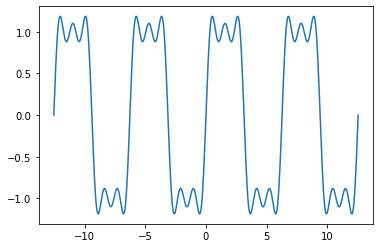

In [25]:
## TO DO: Plot the sum of the first 5 elements.
k_array = np.array([1,2,3,4,5])
bk_array = np.array([0,0,0,0,0], dtype = float)
for i in range(np.size(k_array)):
    bk_array[i] = round(bk_vals(k_array[i]), 8)

x = np.linspace(-4*math.pi, 4*math.pi, num=500)
y = []
for xval in x:
    y.append(bk_array[0]*math.sin(xval) + bk_array[1]*math.sin(2*xval) + bk_array[2]*math.sin(3*xval) + bk_array[3]*math.sin(4*xval) + bk_array[4]*math.sin(5*xval))
plt.plot(x,y)

Plot the sum of the first 10 elements in the fourier sine series for the square wave function.

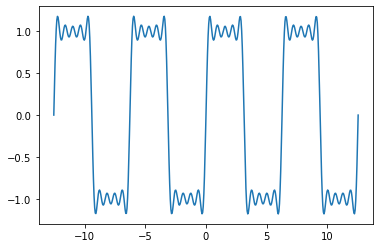

In [27]:
## TO DO: Plot the sum of the first 10coefficient  elements.
k_array = np.array([1,2,3,4,5,6,7,8,9,10])
bk_array = np.array([0,0,0,0,0,0,0,0,0,0], dtype = float)
for i in range(np.size(k_array)):
    bk_array[i] = round(bk_vals(k_array[i]), 8)

x = np.linspace(-4*math.pi, 4*math.pi, num=500)
y = []
for xval in x:
    y.append(bk_array[0]*math.sin(xval) + bk_array[1]*math.sin(2*xval) + bk_array[2]*math.sin(3*xval) + bk_array[3]*math.sin(4*xval) + bk_array[4]*math.sin(5*xval) + bk_array[5]*math.sin(6*xval) + bk_array[6]*math.sin(7*xval) + bk_array[7]*math.sin(8*xval) + bk_array[8]*math.sin(9*xval) + bk_array[9]*math.sin(10*xval))
plt.plot(x,y)

Plot the sum of the first 100 elements in the fourier sine series for the square wave function.

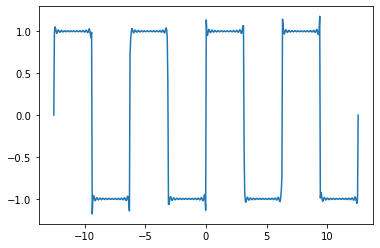

In [53]:
## TO DO: Plot the sum of the first 100 elements.
k_array = np.linspace(1,100,num=100)
bk_array = np.zeros(k_array.size, dtype = float)
for i in range(np.size(k_array)):
    bk_array[i] = round(bk_vals(k_array[i]), 8)
x = np.linspace(-4*math.pi, 4*math.pi, num=500)
y = []
for xval in x:
    val=0
    for i in range(k_array.size):
        val = val + bk_array[i]*math.sin((i+1)*xval)
    y.append(val)
plt.plot(x,y)